In [29]:
from skimage import io
# from kmeans import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image

In [28]:
from PIL import Image

In [135]:
import numpy as np
import operator

# Euclidean Distance Caculator
def calcDist(x, y):
    return np.linalg.norm(x - y, axis=1)


def kmeans(X: np.ndarray, k: int, centroids=None, tolerance=1e-2):
    n, p = X.shape

    if centroids == 'kmeans++':
        CentroidIdxs = np.random.choice(range(n), 1)
        remainingIdxs = np.arange(n)
        for i in range(k - 1):
            remainingIdxs = remainingIdxs[~np.isin(remainingIdxs, CentroidIdxs)]
            dict1 = {}
            for j in remainingIdxs:
                distances = calcDist(X[j], X[CentroidIdxs])
                idxMin = np.argmin(distances)
                dict1[j] = distances[idxMin]
            CentroidIdxs = np.append(CentroidIdxs, max(dict1.items(), key=operator.itemgetter(1))[0])
        centroids = X[CentroidIdxs, :]
    else:
        idx = np.random.choice(range(n), k, replace=False)
        centroids = X[idx, :]

    clusters = []
    for i in range(0, k):
        clusters.append([])

    flag = True
    while flag:
        prevCentroids = centroids
        for j in range(n):
            distances = calcDist(X[j], centroids)
            cluster = np.argmin(distances)
            clusters[cluster].append(j)

        for i in range(k):
            cluster = clusters[i]
            newCentroid = np.mean(X[cluster, :])
            centroids[i] = newCentroid
        if np.linalg.norm(prevCentroids.flatten() - centroids.flatten()) <= tolerance:
            flag = False

    return centroids, clusters


In [92]:
img = Image.open('mario.png')
# img = img.convert("L")     # grayscale
# img.show()
# X = np.array(img.getdata(), dtype=np.uint8)

In [93]:
X_ = np.array(img.getdata(), dtype=np.uint8)

In [94]:
# N,p=X_.reshape(-1,1).shape
p

1

In [67]:
k=4
centroids, clusters = kmeans(X.reshape(-1,1), k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
# reassign_grey(X, centroids)
# img_ = Image.fromarray(X.reshape(h,w), 'L') # L means grayscale
# img_.show()

In [80]:
X.shape

(2730942,)

In [81]:
ret=np.zeros(N)
ret.shape

(2730942,)

In [ ]:
from statistics import mode
def reassign_grey(X, clusters,centroids):
    X1=X
    for i in range(k):
        X1[]=mode(X[centroids])

In [69]:
for i in range(k):
    
    ret[clusters[i]]=centroids[i]

In [74]:
X

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [73]:
ret.reshape(N,p)

array([[149.],
       [149.],
       [149.],
       ...,
       [149.],
       [149.],
       [149.]])

In [76]:
img_ = Image.fromarray(ret.reshape(N,p), 'L') 

In [77]:
img_

In [59]:
img_.show()

In [45]:
len(clusters)

4

In [37]:
centroids

array([[149],
       [236],
       [235],
       [234]], dtype=uint8)

In [87]:
k=32
centroids, clusters = kmeans(X_.reshape(-1,1), k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
reassign_colors(clusters, centroids)
img_ = Image.fromarray(X.reshape((h,w,3)))
img_.show()

KeyboardInterrupt: 

In [ ]:
def reassign_colors(clusters, centroids):
    ret_X=
    for i in range(k):
        ret[clusters[i]]=centroids[i]
    

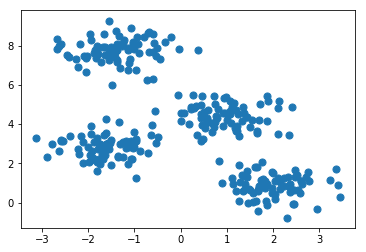

In [95]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [96]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [101]:
X.shape

(300, 2)

In [103]:
y_kmeans

array([0, 2, 1, 2, 0, 0, 3, 1, 2, 2, 3, 2, 1, 2, 0, 1, 1, 0, 3, 3, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 0, 1, 3, 1, 1,
       3, 3, 2, 3, 2, 0, 3, 0, 2, 0, 0, 3, 2, 3, 2, 0, 2, 1, 2, 3, 3, 3,
       2, 0, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 1, 0, 2, 3, 3, 1, 0, 0, 1, 3, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1,
       3, 3, 0, 2, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3,
       3, 0, 2, 3, 3, 2, 1, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 2, 1,
       0, 3, 2, 3, 0, 1, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 3, 2,
       0, 0, 1, 3, 0, 1, 3, 3, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 2, 1, 3, 0, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 2, 3, 3, 0, 0, 1,
       2, 0, 0, 3, 0, 3, 1, 2, 2, 1, 1, 2, 1, 0, 3, 1, 0, 3, 2, 3, 0, 1,
       0, 2, 2, 2, 2, 3, 3, 2, 1, 3, 0, 1, 3, 3, 3, 0, 0, 2, 1, 1, 3, 0,
       2, 3, 1, 2, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 3, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 3], d

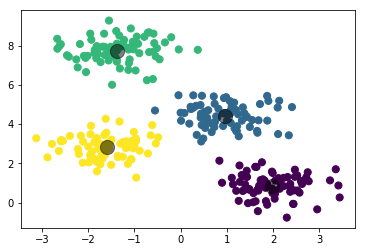

In [97]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [104]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
import numpy as np

# create the data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# use the nearest neighbor graph as our adjacency matrix
A = kneighbors_graph(X, n_neighbors=5).toarray()
print(A)

# [[0. 0. 0. ... 0. 0. 0.]
#  [0. 0. 0. ... 0. 0. 0.]
#  [0. 0. 0. ... 0. 0. 0.]
#  ...
#  [0. 0. 0. ... 0. 1. 0.]
#  [0. 0. 0. ... 0. 0. 0.]
#  [0. 0. 0. ... 0. 0. 0.]]
 
# create the graph laplacian
D = np.diag(A.sum(axis=1))
L = D-A

# find the eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

# use Fiedler value to find best cut to separate data
clusters = vecs[:,1] > 0

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [105]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

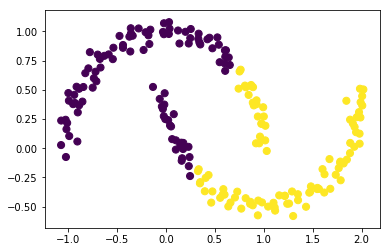

In [106]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


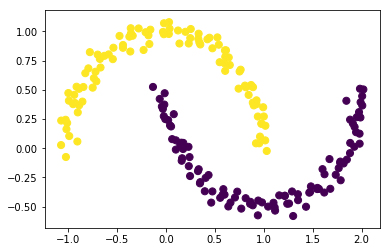

In [107]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [109]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [110]:
img = mpimg.imread('website.jpg')

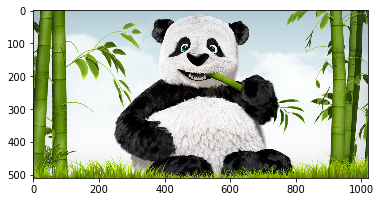

In [111]:
imgplot = plt.imshow(img)

In [112]:
image_reshaped_2D = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))  

In [115]:
k1=32
centroids, clusters = kmeans(image_reshaped_2D, k=k1, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)

In [116]:
def reassign_colors(X, centroids, clusters, k):
    m, n = X.shape 
    ret_X=np.zeros((m, n))
    for i in range(k):
        ret_X[clusters[i]]=centroids[i]
    return ret_X  

In [117]:

recovered_img = reassign_colors(image_reshaped_2D, centroids, clusters,k1)

In [118]:
recovered_img_3D = np.reshape(recovered_img, (img.shape[0], img.shape[1], img.shape[2])) 

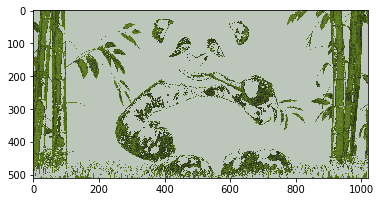

In [119]:
plt.imshow((recovered_img_3D).astype(np.uint8))

In [120]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [121]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

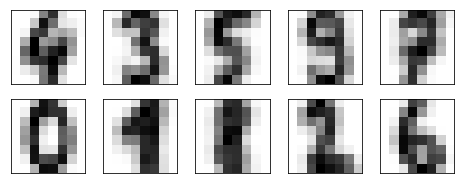

In [122]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


In [125]:
clusters.shape

(1797,)

In [ ]:
def reassign_colors(X, centroids, clusters, k):
    m, n = X.shape 
    ret_X=np.zeros((m, n))
    for i in range(k):
        ret_X[clusters[i]]=centroids[i]
    return ret_X  

In [ ]:
import numpy as np
from sklearn.neighbors import kneighbors_graph

def kmeans(X:np.ndarray, k:int, centroids=None, tolerance=1e-2):
​
    dim = X.shape[1]
    n_obs = X.shape[0]
​
    if centroids == 'kmeans++':
        centroids = initial_centroid_kplus(X,k)
    else:
        centroids = np.random.rand(k,dim)
​
    new_centroids = np.random.rand(k,dim)
    centroid_assign=np.empty(n_obs)
    centroid_assign.fill(-1)
​
    diff_clusters = True
​
    while diff_clusters:
​
        # Finding nearest centroids
        m_distances=[]
        for j in range(0,k):
            dist_cluster = np.linalg.norm((X-centroids[j]),axis=1)
            m_distances.append(dist_cluster)
​
        centroid_assign = np.argmin(m_distances, axis=0)
​
        # Recomputing centroids
        for i_clust in range(0,k):
            new_clust = np.mean(X[np.where(centroid_assign==i_clust,True,False),:],axis=0)
            new_centroids[i_clust] = new_clust
​
        # Checking whether the new centroids are equal to the previous ones
        if np.all(np.isclose(centroids, new_centroids, atol=tolerance)):
            diff_clusters = False
​
        centroids = new_centroids
​
    # Mapping observations to each cluster
    #clusters =  np.array([np.where(centroid_assign ==i) for i in range(0,k)])
    clusters =  [(np.where(centroid_assign ==i))[0] for i in range(0,k)]
    clusters = np.array(clusters)
    return centroids, clusters
​
def initial_centroid_kplus(X,k):
​
    centroids = []
    selected_points = []
    # First random centroid
    first_point = np.random.choice(X.shape[0], 1)
    selected_points.append(first_point)
    centroids.append(X[first_point][0])
​
    for i in range(1,k):
        m_distances = []
​
        # Compute distances to each cluster
        n_k = len(centroids)
        for j in range(0,n_k):
            dist_cluster = np.linalg.norm((X-centroids[j]),axis=1)
            m_distances.append(dist_cluster)
​
        # Compute min distance to each cluster
        min_distances = np.amin(m_distances, axis = 0)
​
        # Choose the obs with the max distance
        i_next_cluster = np.argmax(min_distances)
​
        centroids.append(X[i_next_cluster])
​
    centroids = np.array(centroids)
​
    return centroids


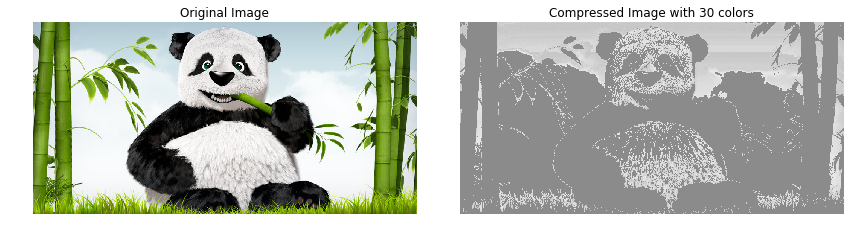

In [137]:
img = mpimg.imread('website.jpg')
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Run the Kmeans algorithm
centroids, clusters = kmeans(image_reshaped_2D, k=k1, centroids='kmeans++', tolerance=.01)

# Use the centroids to compress the image
X_compressed = reassign_colors(image_reshaped_2D, centroids, clusters,k1)
# X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();